<a href="https://colab.research.google.com/github/junecv/EAD/blob/main/sp500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ingest

Mounted at /content/drive


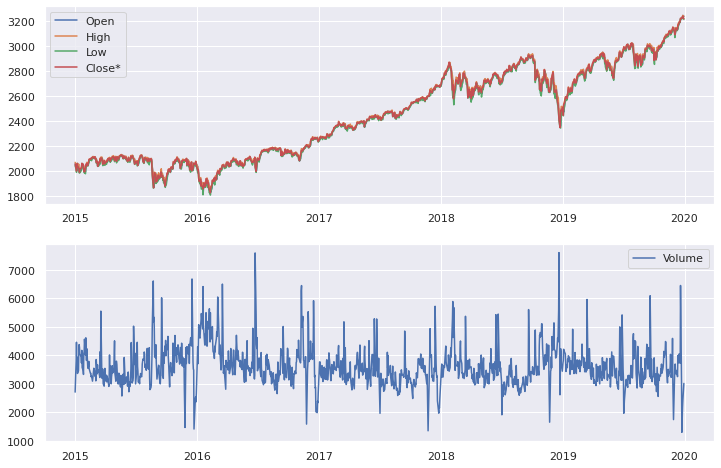

(101, 16) (904, 16)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
# read data file

lst = []

with open('/content/drive/My Drive/data/sp500/sp500.txt', 'r') as f:
  for line in f.readlines():
    record = line.split('\t')
    record[-1] = str(record[-1][0:-1])
    for i in range(1,len(record)):
      record[i] = record[i].replace(',' , '')
    lst.append(record)
# convert data to dataframe
sp500 = pd.DataFrame(lst, columns=lst[0])
sp500.drop(index=0, axis=1, inplace=True)

# set dtype for columns
sp500.Date = pd.to_datetime(sp500.Date)
sp500.iloc[:,1:] = sp500.iloc[:,1:].apply(pd.to_numeric, axis=1)

# sort and reset index
sp500 = sp500.sort_values(by='Date')
sp500.reset_index(drop=True, inplace=True)

# assign train to df

df = sp500
### EDA
# review data 
df.describe()
# check any "close" and "adj close" different
(df['Close*'] != df['Adj Close**']).sum()
# drop adjusted close
df.drop('Adj Close**', axis=1, inplace=True)
# data tranformation due to scale
# transofrm volumne to unit millions

df['Volume'] = df['Volume'] / 1000000     
# plot data

plt.figure(figsize=(12,8))

plt.subplot(2, 1, 1)
plt.plot('Date', 'Open', data = df, label='Open')
plt.plot('Date', 'High', data = df, label='High')
plt.plot('Date', 'Low', data = df, label='Low')
plt.plot('Date', 'Close*', data = df, label='Close*')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('Date', 'Volume', data = df, label='Volume')

plt.legend()
plt.show()
# Data Engineeering

df.loc[:, 'open_close'] = df['Open'] - df['Close*']
df.loc[:, 'high_close'] = df['High'] - df['Close*']
df.loc[:, 'low_close'] = df['Low'] - df['Close*']
df.loc[:, 'high_low'] = df['High'] - df['Low']
df.loc[:, 'previous_open'] = df['Open'].shift(1)
df.loc[:, 'previous_high'] = df['High'].shift(1)
df.loc[:, 'previous_low'] = df['Low'].shift(1)
df.loc[:, 'previous_close'] = df['Close*'].shift(1)
df.loc[:, 'weekday'] = df['Date'].dt.dayofweek
df.loc[:, 'month'] = df['Date'].dt.month
df
# transform values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:-3]), columns=df.columns[1:-3])
D = pd.get_dummies(df['Date'].dt.dayofweek, prefix='d')
M = pd.get_dummies(df['Date'].dt.month, prefix='m')
df_scaled = pd.concat([df_scaled, D, M], axis=1)
df_scaled = df_scaled.iloc[1:,:]
df_scaled
# split into training and test set
import random

n = int(len(df) * 0.8)
train = df[:n]
test = df[n:]

n = int(len(train) * 0.9)
val = train[n:]
train = train[:n]
print(val.shape, train.shape)

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read data file

lst = []

with open('/content/drive/My Drive/data/sp500/sp500.txt', 'r') as f:
  for line in f.readlines():
    record = line.split('\t')
    record[-1] = str(record[-1][0:-1])
    for i in range(1,len(record)):
      record[i] = record[i].replace(',' , '')
    lst.append(record)

In [4]:
# convert data to dataframe
sp500 = pd.DataFrame(lst, columns=lst[0])
sp500.drop(index=0, axis=1, inplace=True)

# set dtype for columns
sp500.Date = pd.to_datetime(sp500.Date)
sp500.iloc[:,1:] = sp500.iloc[:,1:].apply(pd.to_numeric, axis=1)

# sort and reset index
sp500 = sp500.sort_values(by='Date')
sp500.reset_index(drop=True, inplace=True)

In [5]:
# assign train to df

df = sp500

### EDA

In [6]:
# review data 
df.describe()

,Open,High,Low,Close*,Adj Close**,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,2451.796683,2462.313747,2440.088584,2452.023986,2452.023986,3.626046e+09
std,356.898418,357.373502,356.503144,356.918876,356.918876,6.717614e+08
min,1833.400000,1847.000000,1810.100000,1829.080000,1829.080000,1.296540e+09
25%,2101.680000,2108.920000,2092.130000,2102.060000,2102.060000,3.232700e+09
50%,2434.150000,2441.490000,2427.940000,2433.790000,2433.790000,3.520910e+09
75%,2770.540000,2782.810000,2757.120000,2770.370000,2770.370000,3.900280e+09
max,3247.230000,3247.930000,3234.370000,3240.020000,3240.020000,7.609010e+09


In [7]:
# check any "close" and "adj close" different
(df['Close*'] != df['Adj Close**']).sum()

0

In [8]:
# drop adjusted close
df.drop('Adj Close**', axis=1, inplace=True)

In [9]:
# data tranformation due to scale
# transofrm volumne to unit millions

df['Volume'] = df['Volume'] / 1000000     

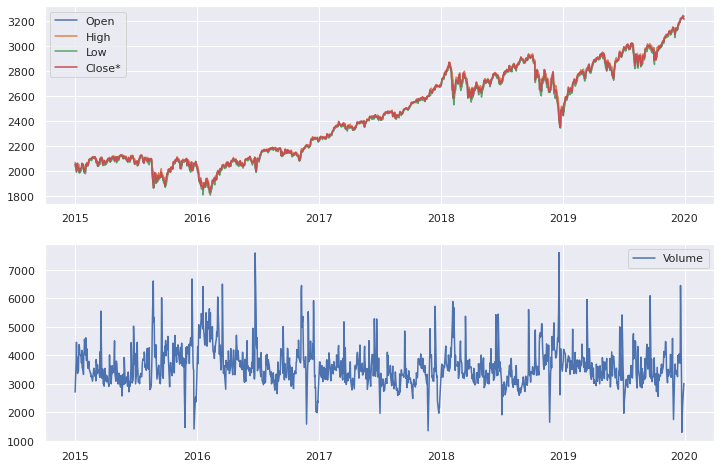

In [10]:
# plot data

plt.figure(figsize=(12,8))

plt.subplot(2, 1, 1)
plt.plot('Date', 'Open', data = df, label='Open')
plt.plot('Date', 'High', data = df, label='High')
plt.plot('Date', 'Low', data = df, label='Low')
plt.plot('Date', 'Close*', data = df, label='Close*')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('Date', 'Volume', data = df, label='Volume')

plt.legend()
plt.show()

In [11]:
# Data Engineeering

df.loc[:, 'open_close'] = df['Open'] - df['Close*']
df.loc[:, 'high_close'] = df['High'] - df['Close*']
df.loc[:, 'low_close'] = df['Low'] - df['Close*']
df.loc[:, 'high_low'] = df['High'] - df['Low']
df.loc[:, 'previous_open'] = df['Open'].shift(1)
df.loc[:, 'previous_high'] = df['High'].shift(1)
df.loc[:, 'previous_low'] = df['Low'].shift(1)
df.loc[:, 'previous_close'] = df['Close*'].shift(1)
df.loc[:, 'weekday'] = df['Date'].dt.dayofweek
df.loc[:, 'month'] = df['Date'].dt.month

In [164]:
# seperate input and response
df_y = df['Close*']
df_X = df.drop(['Date','Close*','weekday','month'], axis=1, inplace=False)

# transform values
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
df_X_scaled = pd.DataFrame(scaler_X.fit_transform(df_X), columns=df_X.columns)

scaler_y = MinMaxScaler()
df_y_scaled = pd.DataFrame(scaler_y.fit_transform(df_y.to_numpy().reshape(-1,1)))

# one hot encoding on Date and Month
D = pd.get_dummies(df['Date'][:].dt.dayofweek, prefix='d')
M = pd.get_dummies(df['Date'][:].dt.month, prefix='m')

# combine dataframe
df_X_scaled = pd.concat([df_X_scaled, D, M], axis=1)
df_X_scaled = df_X_scaled[1:]

In [168]:
# split into training and test set
import random

n = int(len(df_X_scaled) * 0.8)
train_X = df_X_scaled[:n]
train_y = df_y_scaled[:n]
test_X = df_X_scaled[n:]
test_y = df_y_scaled[n:]

n = int(len(train) * 0.9)
val_X = train_X[n:]
val_y = train_y[n:]
train_X = train_X[:n]
train_y = train_y[:n]

In [171]:
print(val_X.shape, train_X.shape)

(191, 29) (813, 29)


In [172]:
# create keras dataset

train_ds = keras.preprocessing.timeseries_dataset_from_array(
    train_X,
    train_y,
    sequence_length = 1
)

val_ds = keras.preprocessing.timeseries_dataset_from_array(
    val_X,
    val_y,
    sequence_length = 1
)

### Modeling 1: Simple RNN

In [173]:
for batch in train_ds.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (128, 1, 29)
Target shape: (128, 1)


In [174]:
for batch in val_ds.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (128, 1, 29)
Target shape: (128, 1)


In [175]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))

In [176]:
# a simple RNN

model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(),
    tf.keras.layers.SimpleRNN(1),
    tf.keras.layers.Dense(1)]
)

model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss='mse'
)

In [177]:
epochs = 200

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/200
7/7 [==============================] - 1s 64ms/step - loss: 0.3203 - val_loss: 0.1348
Epoch 2/200
7/7 [==============================] - 0s 38ms/step - loss: 0.2121 - val_loss: 0.0798
Epoch 3/200
7/7 [==============================] - 0s 39ms/step - loss: 0.1614 - val_loss: 0.0530
Epoch 4/200
7/7 [==============================] - 0s 37ms/step - loss: 0.1354 - val_loss: 0.0388
Epoch 5/200
7/7 [==============================] - 0s 38ms/step - loss: 0.1199 - val_loss: 0.0304
Epoch 6/200
7/7 [==============================] - 0s 38ms/step - loss: 0.1092 - val_loss: 0.0249
Epoch 7/200
7/7 [==============================] - 0s 36ms/step - loss: 0.1010 - val_loss: 0.0210
Epoch 8/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0942 - val_loss: 0.0180
Epoch 9/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0883 - val_loss: 0.0157
Epoch 10/200
7/7 [==============================] - 0s 36ms/step - loss: 0.0831 - val_loss: 0.0138
Epoch 11/200
7/7 [=

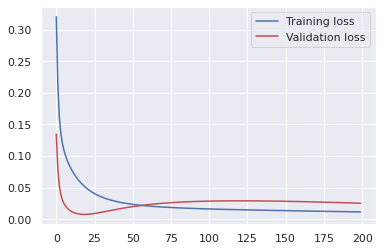

In [178]:
# plot 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()

### Modeling 2: LSTM

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1, 29)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                7936      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,969
Trainable params: 7,969
Non-trainable params: 0
_________________________________________________________________


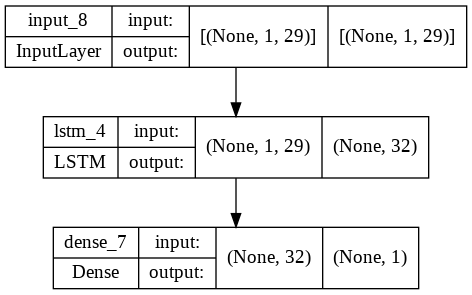

In [179]:
learning_rate = 0.001

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [180]:
epochs = 200

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/200
7/7 [==============================] - 3s 120ms/step - loss: 0.1224 - val_loss: 0.3518
Epoch 2/200
7/7 [==============================] - 0s 46ms/step - loss: 0.0729 - val_loss: 0.2420
Epoch 3/200
7/7 [==============================] - 0s 41ms/step - loss: 0.0401 - val_loss: 0.1573
Epoch 4/200
7/7 [==============================] - 0s 43ms/step - loss: 0.0205 - val_loss: 0.0966
Epoch 5/200
7/7 [==============================] - 0s 42ms/step - loss: 0.0116 - val_loss: 0.0576
Epoch 6/200
7/7 [==============================] - 0s 43ms/step - loss: 0.0096 - val_loss: 0.0357
Epoch 7/200
7/7 [==============================] - 0s 41ms/step - loss: 0.0104 - val_loss: 0.0254
Epoch 8/200
7/7 [==============================] - 0s 41ms/step - loss: 0.0111 - val_loss: 0.0217
Epoch 9/200
7/7 [==============================] - 0s 43ms/step - loss: 0.0107 - val_loss: 0.0215
Epoch 10/200
7/7 [==============================] - 0s 42ms/step - loss: 0.0097 - val_loss: 0.0226
Epoch 11/200
7/7 [

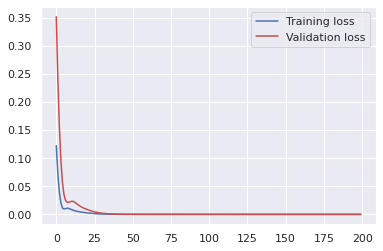

In [181]:
# plot 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()

### Modeling 3: Stacked LSTM 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 29)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             7936      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,289
Trainable params: 16,289
Non-trainable params: 0
_________________________________________________________________


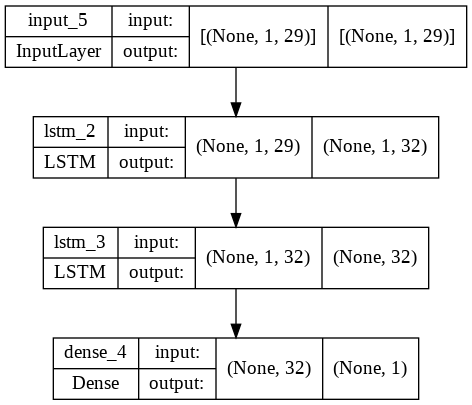

In [121]:
learning_rate = 0.001

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32, return_sequences=True)(inputs)
lstm_stacked_out = keras.layers.LSTM(32)(lstm_out)
outputs = keras.layers.Dense(1)(lstm_stacked_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [122]:
epochs = 200

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/200
8/8 [==============================] - 5s 163ms/step - loss: 58.1501 - val_loss: 59.3178
Epoch 2/200
8/8 [==============================] - 0s 36ms/step - loss: 54.5767 - val_loss: 55.6913
Epoch 3/200
8/8 [==============================] - 0s 34ms/step - loss: 50.7148 - val_loss: 51.4817
Epoch 4/200
8/8 [==============================] - 0s 41ms/step - loss: 45.8505 - val_loss: 45.8192
Epoch 5/200
8/8 [==============================] - 0s 35ms/step - loss: 39.4295 - val_loss: 38.5353
Epoch 6/200
8/8 [==============================] - 0s 34ms/step - loss: 31.7545 - val_loss: 30.5513
Epoch 7/200
8/8 [==============================] - 0s 38ms/step - loss: 24.0020 - val_loss: 22.7811
Epoch 8/200
8/8 [==============================] - 0s 40ms/step - loss: 17.1571 - val_loss: 16.0934
Epoch 9/200
8/8 [==============================] - 0s 40ms/step - loss: 11.6806 - val_loss: 10.9339
Epoch 10/200
8/8 [==============================] - 0s 38ms/step - loss: 7.6427 - val_loss: 7.2316


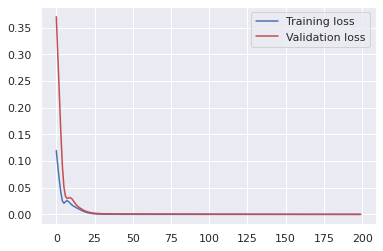

In [185]:
# plot 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()

### Prediciting on test set

In [182]:
x_reshaped = test_X.to_numpy().reshape(-1,1,29)
pred = model.predict(x_reshaped)

In [188]:
y_pred = scaler_y.inverse_transform(pred).flatten()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


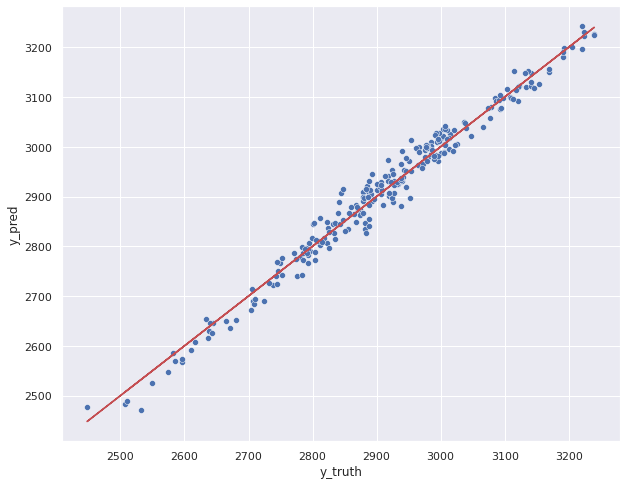

In [196]:
plt.figure(figsize=(10,8))
sns.scatterplot(df[1005:1257]['Close*'], y_pred);
plt.plot(df[1005:1257]['Close*'], df[1005:1257]['Close*'], color='r');
plt.xlabel('y_truth')
plt.ylabel('y_pred')
plt.show();

In [205]:
mse = np.average((df[1005:1257]['Close*'] - y_pred)**2)
mse**(1/2)

22.474294392571647

### Conclusion

LSTM for timeseries is a promising approach to predict timeseries data, much better than a simiple RNN. It shows that, in case where historical data is a strong indicator for future result, the architect of LSTM helps extract information. 

For prediction of closing price, a 22 points difference is achieved, which makes it a very good predictor for closing.